# Import packages

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
os.getcwd()

'C:\\Users\\patil\\Documents\\GitHub\\sagemaker-pytorch-classifier\\notebooks'

# Get data from the CIFAR10 dataset and load in testing an dtraining datasets

In [3]:
# Define simple transformations: convert to tensor and normalize
# Normalization rescales pixel values to the range [-1, 1], which is standard for CNNs
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 1. Download and Load Training Data
# The 'root=./data' argument ensures the data downloads into your /data folder
trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)

# Use DataLoader to handle batching and shuffling
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# 2. Download and Load Test Data
testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# The 10 class labels for CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Data Downloaded and Loaders Created Successfully.")

100.0%


Extracting ../data\cifar-10-python.tar.gz to ../data
Files already downloaded and verified
Data Downloaded and Loaders Created Successfully.


# Display sample images

In [8]:
# Helper function to show an image
def imshow(img):
    # Un-normalize the image from [-1, 1] back to [0, 1] for display
    img = img / 2 + 0.5
    npimg = img.numpy()
    # PyTorch uses C x H x W, Matplotlib expects H x W x C
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)



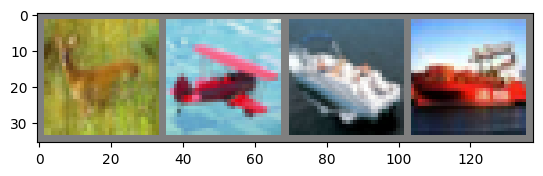

deer plane ship ship


In [9]:
# Show images (uses torchvision.utils.make_grid)
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))